In [1]:
%cd ..

/home/tugash/Documents/gt-explorer


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
# Load Data

In [4]:
data_X = torch.load("data/processed/mini_dataset.pt").numpy()
data_y = torch.load("data/processed/mini_data_y.pt").numpy()

In [5]:
# Run Kmeans

In [6]:
X_std = StandardScaler().fit_transform(data_X)

In [7]:
np.unique(data_y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       dtype=int8),
 array([ 38, 200, 551, 149,  22, 218,  22,  74,  80, 259,  44, 251, 155,
        250, 197, 263, 253,  33, 117,  79,  95, 280,  76, 119, 217, 191,
         76, 279,  60, 281,  28,  43]))

Loop number 20
Loop number 21
Loop number 22
Loop number 23
Loop number 24
Loop number 25
Loop number 26
Loop number 27
Loop number 28
Loop number 29
Loop number 30
Loop number 31
Loop number 32
Loop number 33
Loop number 34
Loop number 35
Loop number 36
Loop number 37
Loop number 38
Loop number 39


/home/tugash/miniconda3/envs/gtexplorer/lib/python3.9/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

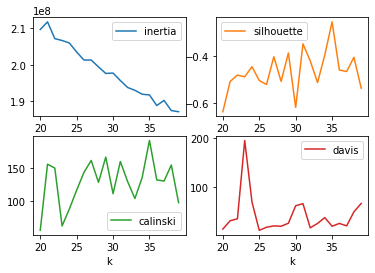

In [8]:
inertias = []
sils = []
chs = []
dbs = []
sizes = range(20, 40)
for k in sizes:
    print(f"Loop number {k}")
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(data_y.reshape(-1,1), k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            data_y.reshape(-1,1), k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            data_y.reshape(-1,1), k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

In [9]:
np.__config__.show()

blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/tugash/miniconda3/envs/gtexplorer/lib']
    include_dirs = ['/home/tugash/miniconda3/envs/gtexplorer/include']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/tugash/miniconda3/envs/gtexplorer/lib']
    include_dirs = ['/home/tugash/miniconda3/envs/gtexplorer/include']
    language = c
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['/home/tugash/miniconda3/envs/gtexplorer/lib']
    language = f77
lapack_opt_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/tugash/miniconda3/envs/gtexplorer/lib']
    language = c
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/tugash/miniconda3/envs